# STINTSY MACHINE PROJECT

## INTRODUCTION

## DESCRIPTION OF THE DATASET

The dataset used for this research, the [Sleep Efficiency Dataset](https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency), is sourced from Kaggle.

The dataset contains information about a group of test subjects and their sleep patterns. Each respondent is identified by a unique "Subject ID" and their age and gender are also recorded. The "Bedtime" and "Wakeup time" features indicate when each subject goes to bed and wakes up each day, and the "Sleep duration" feature records the total amount of time each subject slept in hours. The "Sleep efficiency" feature is a measure of the proportion of time spent in bed that is actually spent asleep. The "REM sleep percentage", "Deep sleep percentage", and "Light sleep percentage" features indicate the amount of time each subject spent in each stage of sleep. The "Awakenings" feature records the number of times each subject wakes up during the night. Additionally, the dataset includes information about each subject's caffeine and alcohol consumption in the 24 hours prior to bedtime, their smoking status, and their exercise frequency.
<br>


**Variable Description** <br>

**Identifier**

1. ID - unique identifier for each participant

**Demographic**

2. Age - age of the respondent
3. Gender - gender of the respondent

**Sleep data**

4. Bedtime - date & time the respondent slept (format in 24-hour format)
5. Wakeup time - date & time the respondent woke up (format in 24-hour format)
6. Sleep duration - total amount of time the respondent slept (in hours)
7. Sleep efficiency - a measure of the proportion of time in bed spent asleep
8. Awakenings - no. of times the respondent wakes up during the night

**Sleep Percentage**

9. REM sleep percent - percentage of total sleep time spent in REM sleep

**What is REM sleep?**

- REM (Rapid Eye Movement) sleep is a phase of the sleep cycle characterized by rapid eye movements, vivid dreaming, muscle paralysis to prevent physical activity during dreams, increased brain activity, and irregular heart rate and breathing. It's one of the two main categories of sleep, alternating with non-REM sleep throughout the night in approximately 90-minute cycles. REM sleep is essential for memory consolidation, emotional processing, and overall cognitive function, contributing to feeling refreshed and alert upon waking. Disruptions in REM sleep can lead to sleep disorders like REM sleep behavior disorder and narcolepsy.

10. Deep sleep percent - percentage of total sleep time spent in deep sleep

**What is deep sleep?**
- Deep sleep, also known as slow-wave sleep (SWS), is the most restorative stage of the sleep cycle, occurring in Stage 3 of non-REM sleep. It features slow brain waves, profound muscle relaxation, limited dreaming, and is challenging to awaken from. Deep sleep is crucial for physical restoration, memory consolidation, immune function, and feeling refreshed upon waking. It's most abundant in the early part of the night and becomes less prevalent as the night progresses.

11. Light sleep percent - percentage of total sleep time spent in light sleep

**What is light sleep?**
- Light sleep, often referred to as Stage 1 and Stage 2 of non-REM (NREM) sleep, is characterized by reduced brain activity and muscle tone compared to wakefulness. During these stages, your body is still relatively responsive to external stimuli, and you can be easily awakened. Light sleep typically occurs at the beginning of the sleep cycle and becomes progressively deeper as you transition into deeper NREM stages and ultimately into REM sleep.

**Controllable values**

12. Caffeine consumption - the amount of caffeine consumed in the 24 hours prior to bedtime (in mg)
13. Alcohol consumption - amount of alcohol consumed in the 24 hours prior to bedtime (in oz)
14. Smoking status - does the respondent smokes or not
15. Excercise Frequency - no. of times the respondent exercises each week

## REQUIREMENTS

The requirement of this project is the Sleep_Efficiency.cvs where the dataset is stored.

### Important Libaries

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Ridge



## DATA CLEANING AND PREPROCESSING

### Reading the Dataset

In [242]:
slpEf_df = pd.read_csv("Sleep_Efficiency.csv")
slpEf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

All of the columns

In [243]:
print(slpEf_df.columns)

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')


Here are the first five observation in the dataset.

In [244]:
slpEf_df.head(5)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


### Data Cleaning

#### Look For Null Values

In [245]:
slpEf_df.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

Printing of Null Values

In [246]:
nullVal = slpEf_df[["Awakenings", "Caffeine consumption", "Alcohol consumption", "Exercise frequency"]].isnull().any(axis=1)
instanceNull = slpEf_df[nullVal]
instanceNull

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
5,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0.0,NaN,0.0,No,1.0
19,20,52,Male,2021-12-03 00:30:00,2021-12-03 07:30:00,7.0,0.89,28,52,20,NaN,50.0,0.0,Yes,3.0
20,21,24,Male,2021-05-02 00:00:00,2021-05-02 08:00:00,8.0,0.83,15,75,10,3.0,0.0,NaN,No,2.0
24,25,24,Male,2021-09-16 00:00:00,2021-09-16 07:00:00,7.0,0.88,15,75,10,1.0,NaN,5.0,No,2.0
26,27,36,Female,2021-06-18 00:00:00,2021-06-18 07:00:00,7.0,0.95,28,55,17,0.0,NaN,0.0,No,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,435,28,Female,2021-08-11 23:00:00,2021-08-11 07:00:00,8.0,0.90,22,63,15,NaN,75.0,2.0,No,4.0
440,441,28,Female,2021-02-06 21:00:00,2021-02-06 05:00:00,8.0,0.88,22,63,15,0.0,75.0,NaN,Yes,2.0
442,443,27,Female,2021-02-06 01:30:00,2021-02-06 08:30:00,7.0,0.68,23,22,55,1.0,NaN,4.0,No,1.0
446,447,23,Male,2021-04-21 00:00:00,2021-04-21 07:00:00,7.0,0.50,15,40,45,2.0,0.0,4.0,Yes,NaN


Replacing Null Values Under Awakenings Column

In [247]:
awakeningsMean = round(slpEf_df['Awakenings'].mean())
print("The mean of the Awakening Column (Rounded To the Nearest Whole Number): " + str(awakeningsMean))
slpEf_df['Awakenings'] = slpEf_df['Awakenings'].fillna(awakeningsMean)

The mean of the Awakening Column (Rounded To the Nearest Whole Number): 2


Replacing Null Values Under Caffeine Consumption Column

In [248]:
cafConsMean = round(slpEf_df['Caffeine consumption'].mean())
print("The mean of the Caffeine Consumption Column (Rounded To the Nearest Whole Number): " + str(cafConsMean))
slpEf_df['Caffeine consumption'] = slpEf_df['Caffeine consumption'].fillna(cafConsMean)

The mean of the Caffeine Consumption Column (Rounded To the Nearest Whole Number): 24


Replacing Null Values Under Alcohol Consumption Column

In [249]:
alcConsMean = round(slpEf_df['Alcohol consumption'].mean())
print("The mean of the Alcohol Consumption Column (Rounded To the Nearest Whole Number): " + str(alcConsMean))
slpEf_df['Alcohol consumption'] = slpEf_df['Alcohol consumption'].fillna(alcConsMean)

The mean of the Alcohol Consumption Column (Rounded To the Nearest Whole Number): 1


Replacing Null Values Under Exercise Frequency Column

In [250]:
exerFreqMean = round(slpEf_df['Exercise frequency'].mean())
print("The mean of the Awakening Colum (Rounded To the Nearest Whole Number): " + str(exerFreqMean))
slpEf_df['Exercise frequency'] = slpEf_df['Exercise frequency'].fillna(exerFreqMean)

The mean of the Awakening Colum (Rounded To the Nearest Whole Number): 2


After Replacement

In [251]:
slpEf_df.isnull().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

In [252]:
instanceNullAfter = slpEf_df.loc[instanceNull.index]
instanceNullAfter

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
5,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0.0,24.0,0.0,No,1.0
19,20,52,Male,2021-12-03 00:30:00,2021-12-03 07:30:00,7.0,0.89,28,52,20,2.0,50.0,0.0,Yes,3.0
20,21,24,Male,2021-05-02 00:00:00,2021-05-02 08:00:00,8.0,0.83,15,75,10,3.0,0.0,1.0,No,2.0
24,25,24,Male,2021-09-16 00:00:00,2021-09-16 07:00:00,7.0,0.88,15,75,10,1.0,24.0,5.0,No,2.0
26,27,36,Female,2021-06-18 00:00:00,2021-06-18 07:00:00,7.0,0.95,28,55,17,0.0,24.0,0.0,No,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,435,28,Female,2021-08-11 23:00:00,2021-08-11 07:00:00,8.0,0.90,22,63,15,2.0,75.0,2.0,No,4.0
440,441,28,Female,2021-02-06 21:00:00,2021-02-06 05:00:00,8.0,0.88,22,63,15,0.0,75.0,1.0,Yes,2.0
442,443,27,Female,2021-02-06 01:30:00,2021-02-06 08:30:00,7.0,0.68,23,22,55,1.0,24.0,4.0,No,1.0
446,447,23,Male,2021-04-21 00:00:00,2021-04-21 07:00:00,7.0,0.50,15,40,45,2.0,0.0,4.0,Yes,2.0


### Data Preprocessing

#### Label Encoding

In [253]:
slpEf_df['Smoking status'].head(5)

0    Yes
1    Yes
2     No
3    Yes
4     No
Name: Smoking status, dtype: object

Convert the Boolean True and Boolean False to Integer

In [254]:
slpEf_df['Smoking status'] = slpEf_df['Smoking status'].map({'Yes': 1, 'No': 0})
print(slpEf_df['Smoking status'].head())

0    1
1    1
2    0
3    1
4    0
Name: Smoking status, dtype: int64


#### Conversion of oz (ounce) to ml (mililiters) on Alcohol Consumption

1 oz is approximately 29.5735297 ml

Before Conversion

In [255]:
slpEf_df["Alcohol consumption"]

0      0.0
1      3.0
2      0.0
3      5.0
4      3.0
      ... 
447    0.0
448    0.0
449    3.0
450    0.0
451    0.0
Name: Alcohol consumption, Length: 452, dtype: float64

Conversion of oz to ml

In [256]:
ozMlConversion = 29.5735297
slpEf_df["Alcohol consumption"] = slpEf_df["Alcohol consumption"].apply(lambda x: round(x * ozMlConversion)if pd.notna(x) else x)

After Conversion

In [257]:
slpEf_df["Alcohol consumption"]

0        0
1       89
2        0
3      148
4       89
      ... 
447      0
448      0
449     89
450      0
451      0
Name: Alcohol consumption, Length: 452, dtype: int64

#### Extraction of Hours in DateTime Format of Columns Bedtime and Wakeup Time

In [258]:
slpEf_df['Bedtime'] = pd.to_datetime(slpEf_df['Bedtime'])
slpEf_df['Wakeup time'] = pd.to_datetime(slpEf_df['Wakeup time'])

# Extract hour from Bedtime and Wakeup time
slpEf_df['Bedtime'] = slpEf_df['Bedtime'].dt.strftime('%H:%M')
slpEf_df['Wakeup time'] = slpEf_df['Wakeup time'].dt.strftime('%H:%M')

#Convert back to DateTime format
slpEf_df['Bedtime'] = pd.to_datetime(slpEf_df['Bedtime'], format='%H:%M')
slpEf_df['Wakeup time'] = pd.to_datetime(slpEf_df['Wakeup time'], format='%H:%M')

# Convert Bedtime and Wakeup time to hours since midnight for correlation calculation
slpEf_df['Bedtime Hour'] = slpEf_df['Bedtime'].dt.hour + slpEf_df['Bedtime'].dt.minute / 60
slpEf_df['Wakeup Hour'] = slpEf_df['Wakeup time'].dt.hour + slpEf_df['Wakeup time'].dt.minute / 60

In [259]:
slpTime = ['Bedtime Hour', 'Wakeup Hour', 'Bedtime', 'Wakeup time']
slpEf_df[slpTime]

,Bedtime Hour,Wakeup Hour,Bedtime,Wakeup time
0,1.0,7.0,1900-01-01 01:00:00,1900-01-01 07:00:00
1,2.0,9.0,1900-01-01 02:00:00,1900-01-01 09:00:00
2,21.5,5.5,1900-01-01 21:30:00,1900-01-01 05:30:00
3,2.5,8.5,1900-01-01 02:30:00,1900-01-01 08:30:00
4,1.0,9.0,1900-01-01 01:00:00,1900-01-01 09:00:00
...,...,...,...,...
447,22.0,5.5,1900-01-01 22:00:00,1900-01-01 05:30:00
448,21.0,3.0,1900-01-01 21:00:00,1900-01-01 03:00:00
449,23.0,7.5,1900-01-01 23:00:00,1900-01-01 07:30:00
450,21.0,4.0,1900-01-01 21:00:00,1900-01-01 04:00:00


## EXPLORATORY DATA ANALYSIS

### Univariate Analysis

#### Numerical

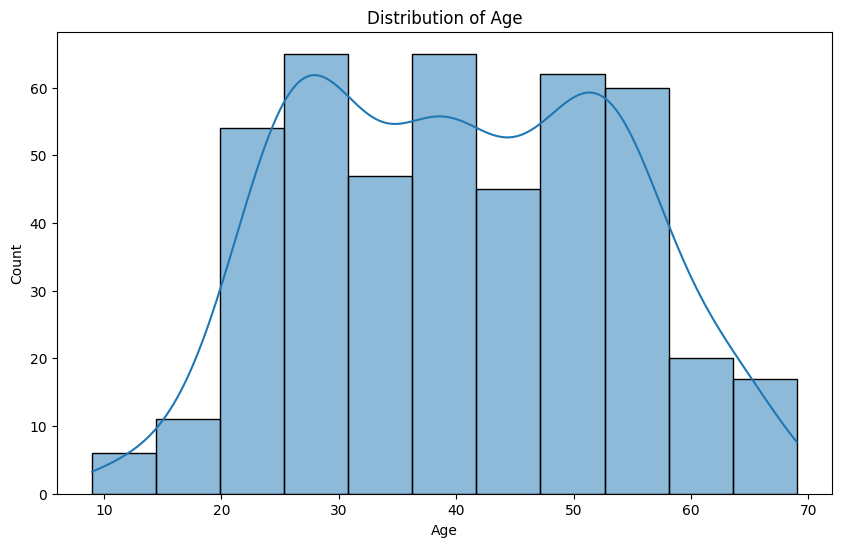

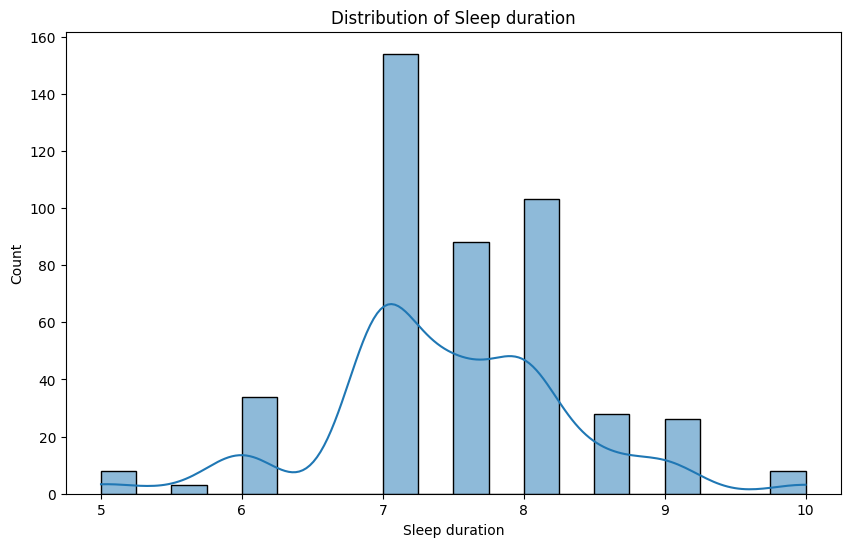

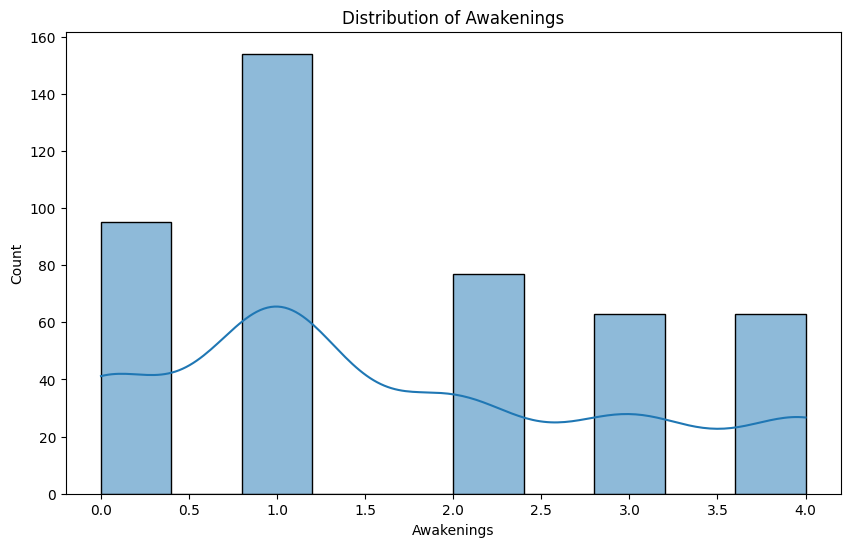

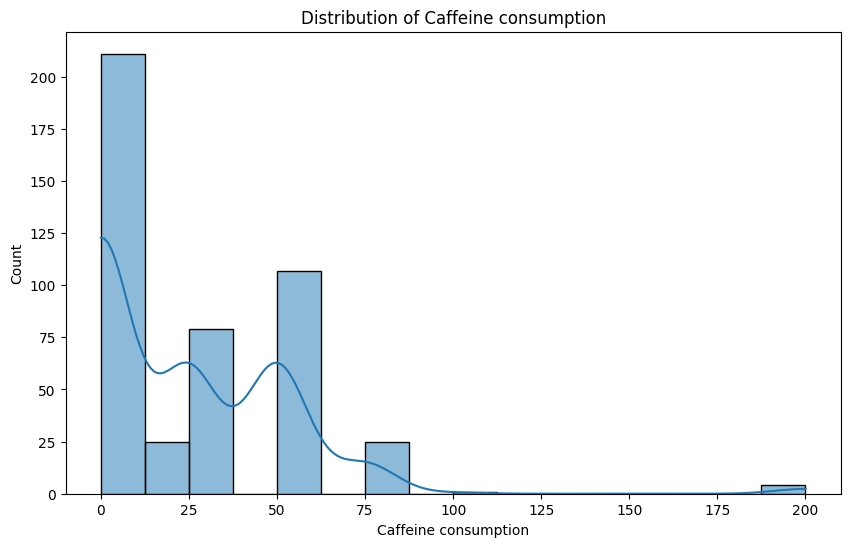

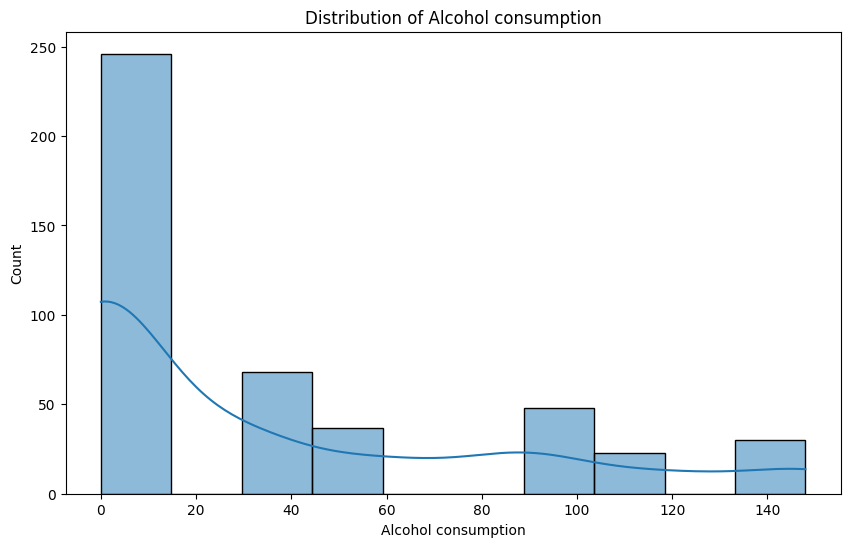

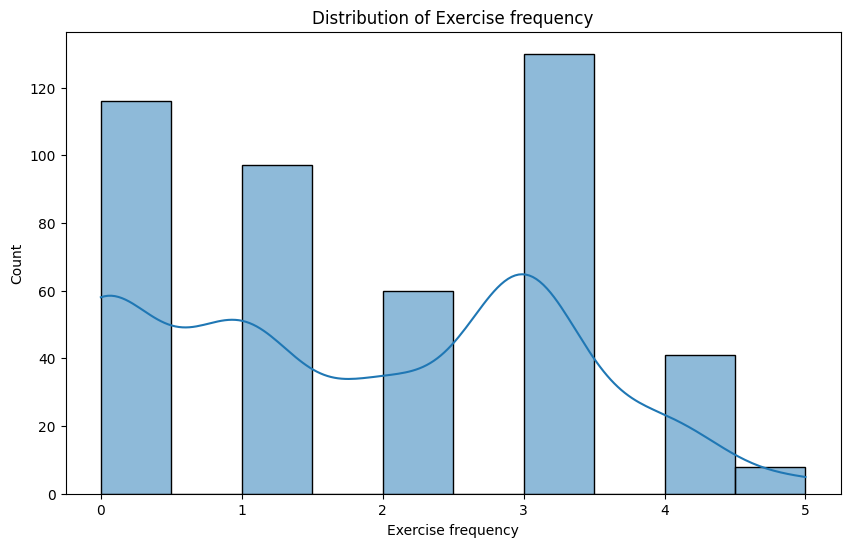

In [260]:
numerical_columns = ['Age', 'Sleep duration', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']
for column in numerical_columns:
    plt.figure(figsize=(10, 6)) 
    sns.histplot(slpEf_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

#### Categorical

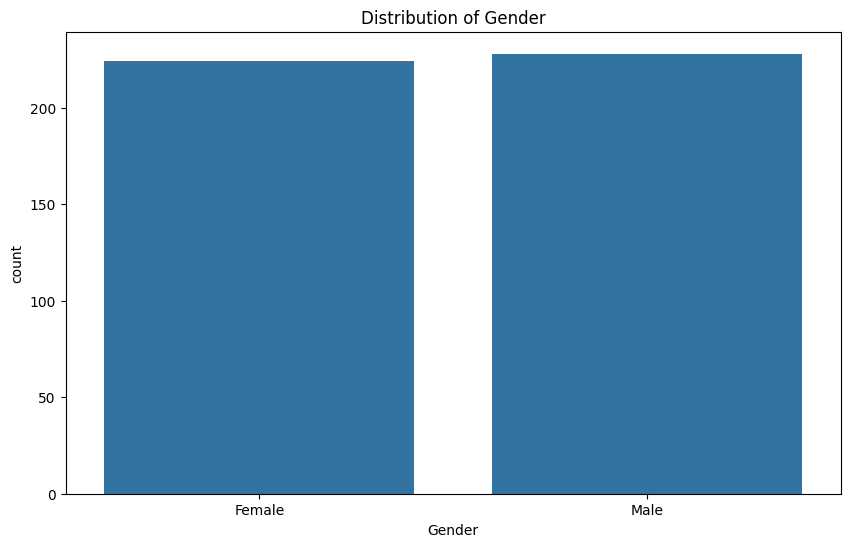

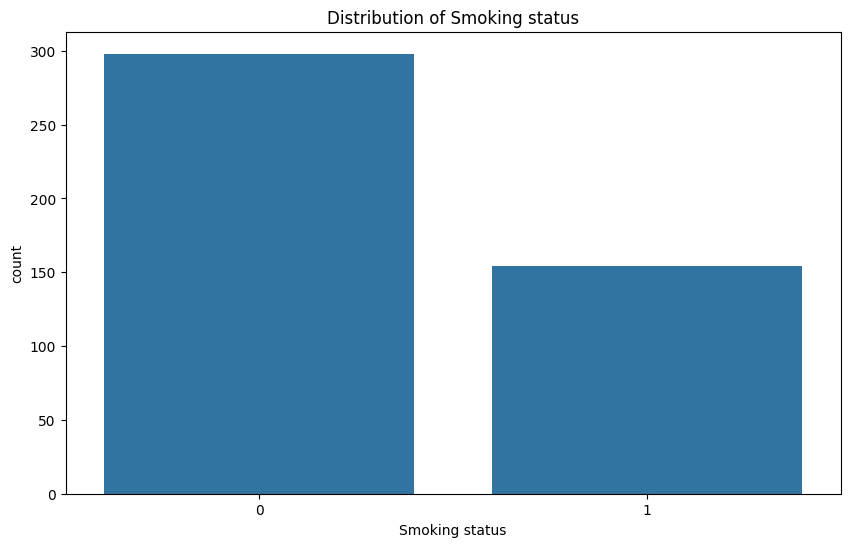

In [261]:
categorical_columns = ['Gender', 'Smoking status']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=slpEf_df)
    plt.title(f'Distribution of {column}')
    plt.show()

### Bivariate Analysis

#### Sleep Duration vs Age

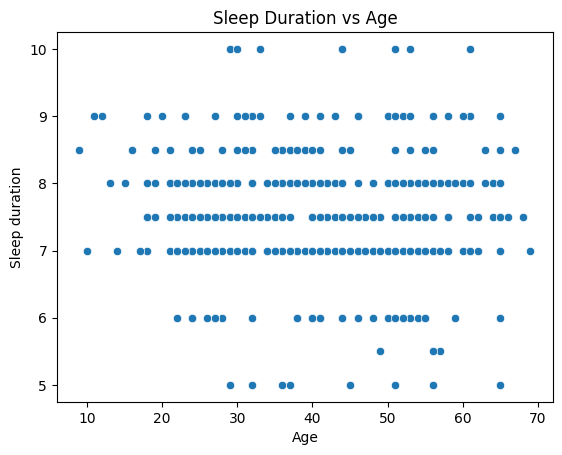

In [262]:
sns.scatterplot(x='Age', y='Sleep duration', data=slpEf_df)
plt.title('Sleep Duration vs Age')
plt.show()

#### Sleep Duration vs Smoking status

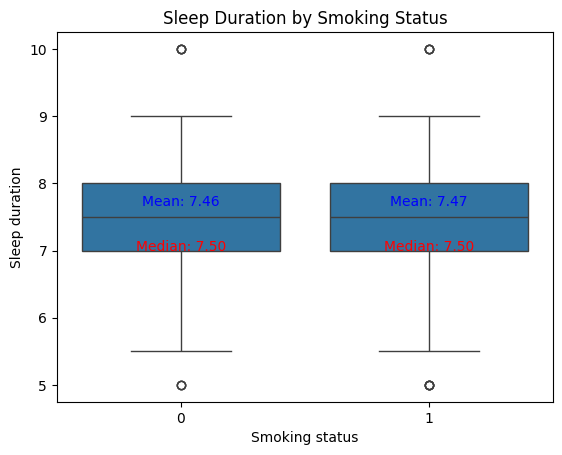

In [263]:
sns.boxplot(x='Smoking status', y='Sleep duration', data=slpEf_df)
plt.title('Sleep Duration by Smoking Status')

mean_values = slpEf_df.groupby('Smoking status')['Sleep duration'].mean()
median_values = slpEf_df.groupby('Smoking status')['Sleep duration'].median()

for i, status in enumerate(mean_values.index):
    plt.text(i, mean_values[status] + 0.2, f'Mean: {mean_values[status]:.2f}', color='blue', ha='center')
    plt.text(i, median_values[status] - 0.5, f'Median: {median_values[status]:.2f}', color='red', ha='center')

plt.show()

### Time-Based Analysis

Median Bedtime: 02:30:00
Median Wakeup Time: 07:00:00


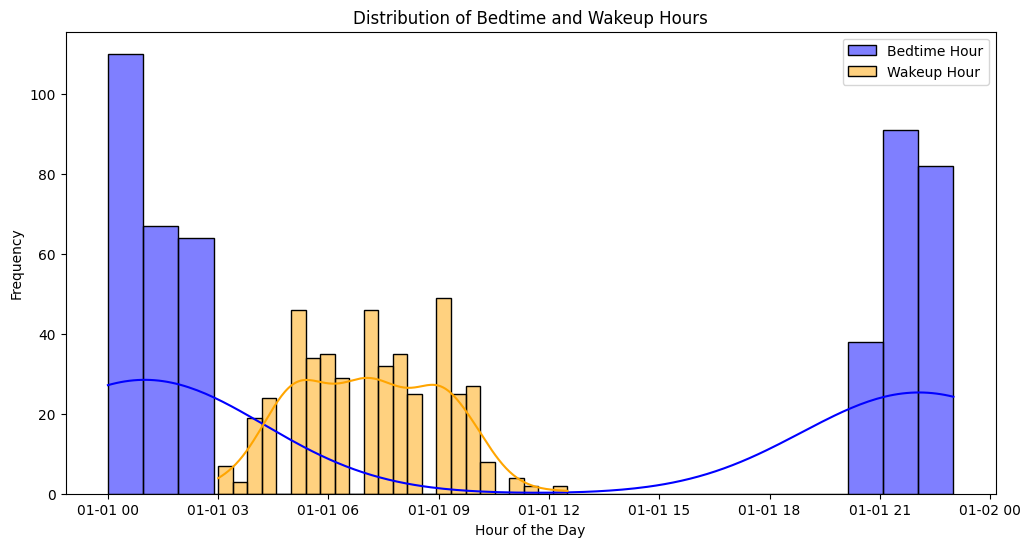

In [264]:
slpEf_df['Bedtime'] = pd.to_datetime(slpEf_df['Bedtime'], format='%H:%M')
slpEf_df['Wakeup time'] = pd.to_datetime(slpEf_df['Wakeup time'], format='%H:%M')

# Calculate median for Bedtime and Wakeup time
median_bedtime = slpEf_df['Bedtime'].median()
median_wakeup = slpEf_df['Wakeup time'].median()

print("Median Bedtime:", median_bedtime.time())
print("Median Wakeup Time:", median_wakeup.time())

# Plot bedtime and wakeup time hours
plt.figure(figsize=(12, 6))
sns.histplot(slpEf_df['Bedtime'], bins=24, kde=True, color='blue', label='Bedtime Hour')
sns.histplot(slpEf_df['Wakeup time'], bins=24, kde=True, color='orange', label='Wakeup Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Distribution of Bedtime and Wakeup Hours')
plt.legend()
plt.show()



### Correlational Analysis

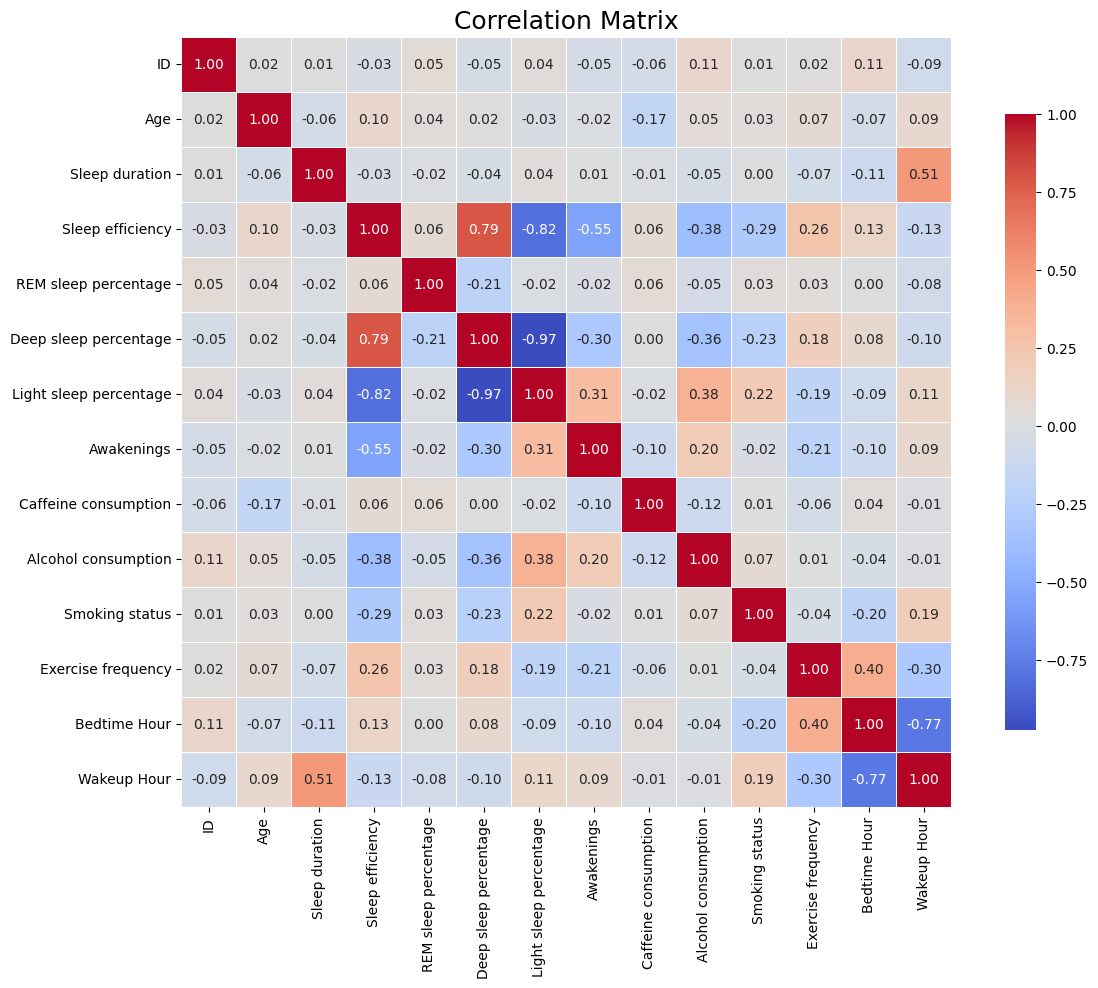

In [265]:
numeric_df = slpEf_df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10)) 

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix', fontsize=18)

plt.show()

## INITIAL MODEL TRAINING

### Variable Setup

Spilting of the Dataset into X and y

In [ ]:
X = slpEf_df[['Sleep duration', 'Awakenings', 
              'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency', 'Smoking status', 
              'Bedtime Hour', 'Wakeup Hour', 'Age']]
y = slpEf_df['Sleep efficiency']

Splitting of the X Dataset to Training Set and Test Set

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

Linear Regression is a simple and interpretable model that assumes a linear relationship between the independent variables and the target variable. It serves as a baseline model in regression tasks.

Training the Model

In [268]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)

LinearRegression()

Predictions

In [269]:
y_pred_train = linReg.predict(X_train)
y_pred = linReg.predict(X_test)

Evaluation

In [270]:
linear_r2_train = r2_score(y_train, y_pred_train)
linear_mse_train = mean_squared_error(y_train, y_pred_train)

print('Linear Regression Train R²:', linear_r2_train)
print('Linear Regression Train MSE:', linear_mse_train)

Linear Regression Train R²: 0.4893442545903125
Linear Regression Train MSE: 0.009267945084354391


In [271]:
linear_r2_test = r2_score(y_test, y_pred)
linear_mse_test = mean_squared_error(y_test, y_pred)

print('Linear Regression Test R²:', linear_r2_test)
print('Linear Regression Test MSE:', linear_mse_test)


Linear Regression Test R²: 0.5293586447643046
Linear Regression Test MSE: 0.008762431555740809


In [272]:
linear_r2_cv = cross_val_score(linReg, X, y, cv=5, scoring='r2')
linear_mse_cv = cross_val_score(linReg, X, y, cv=5, scoring='neg_mean_squared_error')

print("Linear Regression CV R²: ", linear_r2_cv.mean())
print("Linear Regression CV MSE:", -linear_mse_cv.mean())


Linear Regression CV R²:  0.4741600245090639
Linear Regression CV MSE: 0.0095682599665565


Feature Importance

In [273]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linReg.coef_,
    'Absolute Coefficient': np.abs(linReg.coef_) 
})

ranked_features = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)
ranked_features


,Feature,Coefficient,Absolute Coefficient
5,Smoking status,-0.080163,0.080163
1,Awakenings,-0.047803,0.047803
4,Exercise frequency,0.013224,0.013224
7,Wakeup Hour,-0.008963,0.008963
0,Sleep duration,0.008363,0.008363
6,Bedtime Hour,-0.001691,0.001691
8,Age,0.001031,0.001031
3,Alcohol consumption,-0.000727,0.000727
2,Caffeine consumption,0.000126,0.000126


Graphical Representation

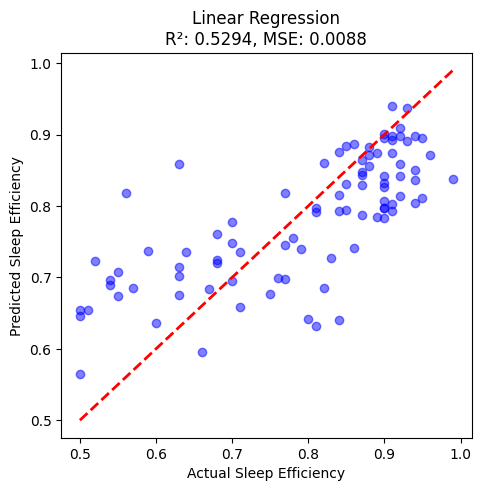

In [274]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel("Actual Sleep Efficiency")
plt.ylabel("Predicted Sleep Efficiency")
plt.title("Linear Regression\nR²: {:.4f}, MSE: {:.4f}".format(
    r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)))
plt.show()

### Decision Tree Regression

Training the Model

In [275]:
dtr_model = DecisionTreeRegressor(
    criterion='friedman_mse',           
    max_depth=None,             
    min_samples_split=10,     
    min_samples_leaf=5,         
    max_features='sqrt',         
    random_state=24,            
    splitter='best'           
)
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_samples_leaf=5, min_samples_split=10,
                      random_state=24)

Predictions

In [276]:
y_pred_train = dtr_model.predict(X_train)
y_pred = dtr_model.predict(X_test)

Evaluation

In [277]:
dtr_r2_train = r2_score(y_train, y_pred_train)
dtr_mse_train = mean_squared_error(y_train, y_pred_train)

print('Decision Tree Regression Train R²:', dtr_r2_train)
print('Decision Tree Regression Train MSE:', dtr_mse_train)


Decision Tree Regression Train R²: 0.7107138936263583
Decision Tree Regression Train MSE: 0.005250284113393532


In [278]:
dtr_r2_test = r2_score(y_test, y_pred)
dtr_mse_test = mean_squared_error(y_test, y_pred)

print('Decision Regression Test R²:', dtr_r2_test)
print('Decision Regression Test MSE:', dtr_mse_test)


Decision Regression Test R²: 0.45857253531624953
Decision Regression Test MSE: 0.010080331974468646


In [279]:
dtr_r2_cv = cross_val_score(dtr_model, X, y, cv=5, scoring='r2')
dtr_mse_cv = cross_val_score(dtr_model, X, y, cv=5, scoring='neg_mean_squared_error')

print("Decision Regression CV R²: ", dtr_r2_cv.mean())
print("Decision Regression CV MSE:", -dtr_mse_cv.mean())


Decision Regression CV R²:  0.4347700358178745
Decision Regression CV MSE: 0.010259324128626707


Feature Importance

In [280]:

importance = dtr_model.feature_importances_


feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})


ranked_features = feature_importance.sort_values(by='Importance', ascending=False)

ranked_features


,Feature,Importance
1,Awakenings,0.383601
3,Alcohol consumption,0.183222
5,Smoking status,0.131363
8,Age,0.119155
4,Exercise frequency,0.057739
6,Bedtime Hour,0.041423
7,Wakeup Hour,0.039563
0,Sleep duration,0.022569
2,Caffeine consumption,0.021365


Graphical Representation

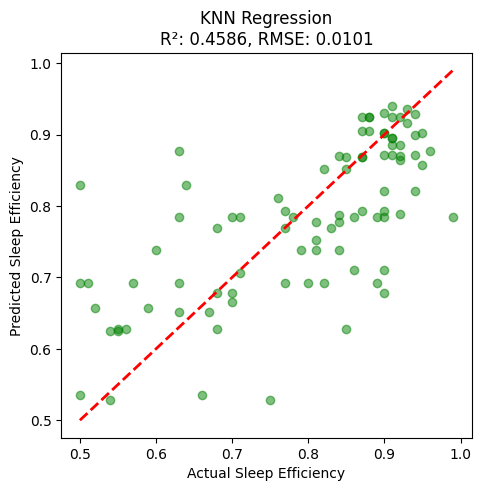

In [281]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred, alpha=0.5, color="green")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel("Actual Sleep Efficiency")
plt.ylabel("Predicted Sleep Efficiency")
plt.title("KNN Regression\nR²: {:.4f}, RMSE: {:.4f}".format(
    r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)))
plt.show()

### Random Forest Regression

Training the Model

In [282]:
rf_model = RandomForestRegressor(
    random_state=42, 
    n_estimators=100,         
    max_depth=10,            
    min_samples_split=2,      
    min_samples_leaf=1,       
    max_features='sqrt'
)

rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', random_state=42)

Predictions

In [283]:
y_pred_train = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)

Evaluation

In [284]:
knn_r2_train = r2_score(y_train, y_pred_train)
knn_mse_train = mean_squared_error(y_train, y_pred_train)

print('Random Forest Regression Train R²:', knn_r2_train)
print('Random Forest Regression Train MSE:', knn_mse_train)


Random Forest Regression Train R²: 0.9311610381031888
Random Forest Regression Train MSE: 0.0012493655936677282


In [285]:
rf_r2_test = r2_score(y_test, y_pred)
rf_mse_test = mean_squared_error(y_test, y_pred)

print('Random Forest Regression Test R²:', rf_r2_test)
print('Random Forest Regression Test MSE:', rf_mse_test)


Random Forest Regression Test R²: 0.6117305147448335
Random Forest Regression Test MSE: 0.007228826689119382


In [286]:
rf_r2_cv = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
rf_mse_cv = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

print("Random Forest Regression CV R²: ", rf_r2_cv.mean())
print("Random Forest Regression CV MSE:", -rf_mse_cv.mean())


Random Forest Regression CV R²:  0.6018461579918954
Random Forest Regression CV MSE: 0.0072733755961525105


In [287]:
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df


,Feature,Importance
1,Awakenings,0.312572
3,Alcohol consumption,0.152548
8,Age,0.142269
5,Smoking status,0.099891
7,Wakeup Hour,0.072600
4,Exercise frequency,0.069032
6,Bedtime Hour,0.064085
0,Sleep duration,0.043901
2,Caffeine consumption,0.043101


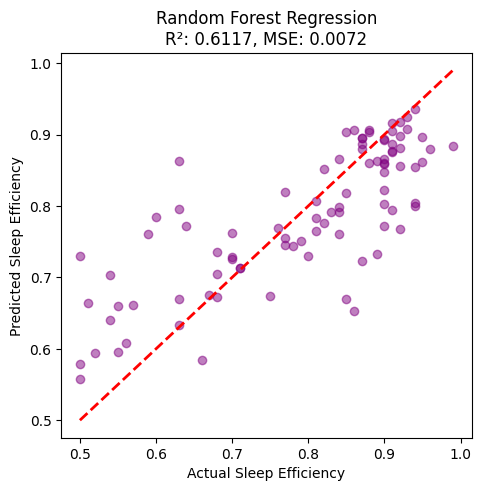

In [288]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred, alpha=0.5, color="purple")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel("Actual Sleep Efficiency")
plt.ylabel("Predicted Sleep Efficiency")
plt.title("Random Forest Regression\nR²: {:.4f}, MSE: {:.4f}".format(
    r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)))
plt.show()

## ERROR ANALYSIS

Bias and Variance

In [289]:
# Define a function to compute bias and variance approximations
def bias_variance_analysis(model, X, y, cv=5):
    # Cross-validate and get predictions on each fold
    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)  # Convert negative MSE scores to RMSE

    # Calculate bias as the mean RMSE
    bias = np.mean(rmse_scores)
    # Calculate variance as the standard deviation of RMSE across folds
    variance = np.std(rmse_scores)
    
    return bias, variance


linear_model_bias, linear_model_variance = bias_variance_analysis(linReg, X_train, y_train)


knn_model_bias, knn_model_variance = bias_variance_analysis(dtr_model, X_train, y_train)


rf_model_bias, rf_model_variance = bias_variance_analysis(rf_model, X_train, y_train)

print("Bias and Variance Analysis:")
print(f"Linear Regression - Bias: {linear_model_bias:.4f}, Variance: {linear_model_variance:.4f}")
print(f"KNN Regression - Bias: {knn_model_bias:.4f}, Variance: {knn_model_variance:.4f}")
print(f"Random Forest Regression - Bias: {rf_model_bias:.4f}, Variance: {rf_model_variance:.4f}")


Bias and Variance Analysis:
Linear Regression - Bias: 0.0999, Variance: 0.0063
KNN Regression - Bias: 0.1075, Variance: 0.0153
Random Forest Regression - Bias: 0.0849, Variance: 0.0076


K-Fold Cross-Validation

In [290]:
# Cross-validation for Linear Regression
linear_scores = cross_val_score(linReg, X, y, cv=5, scoring='neg_mean_squared_error')
print("Linear Regression CV MSE:", -linear_scores.mean())

# Cross-validation for Log Log Regression
rf_scores = cross_val_score(dtr_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Log Log CV MSE:", -rf_scores.mean())

# Cross-validation for Random Forest
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Random Forest CV MSE:", -rf_scores.mean())


Linear Regression CV MSE: 0.0095682599665565
Log Log CV MSE: 0.010259324128626707
Random Forest CV MSE: 0.0072733755961525105


Learning Curve Analysis

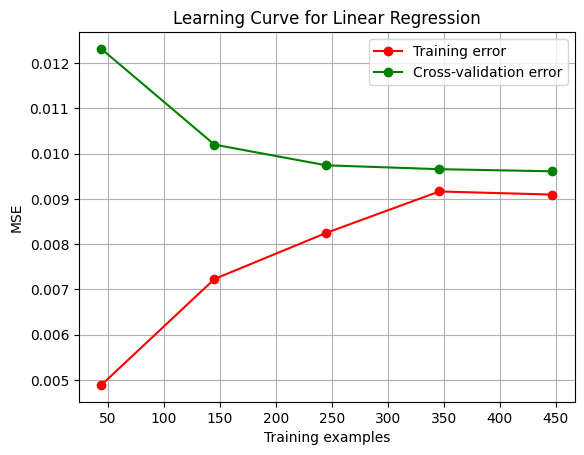

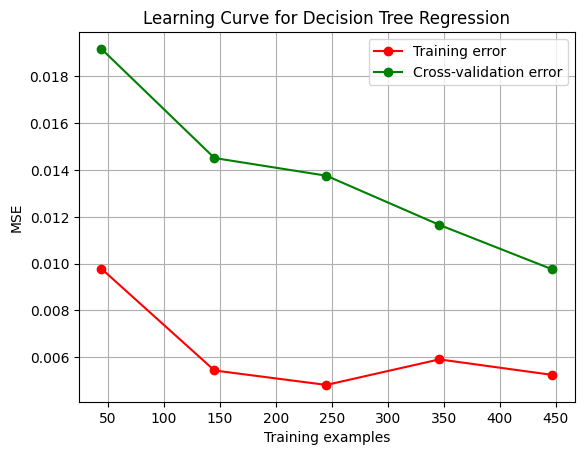

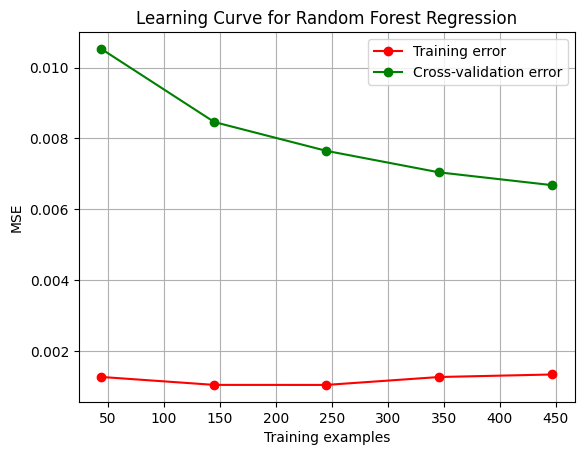

In [291]:
def plot_learning_curve(estimator, title, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=100, 
                                                            scoring='neg_mean_squared_error',
                                                            train_sizes=np.linspace(0.1, 1.0, 5))
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)
    
    plt.figure()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training error")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation error")
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("MSE")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plot learning curves
plot_learning_curve(linReg, "Learning Curve for Linear Regression", X, y)
plot_learning_curve(dtr_model, "Learning Curve for Decision Tree Regression", X, y)
plot_learning_curve(rf_model, "Learning Curve for Random Forest Regression", X, y)


## IMPROVING MODEL PERFORMANCE

**Variable Setup**

In [292]:
X = slpEf_df[['Sleep duration', 'Deep sleep percentage', 'Light sleep percentage','REM sleep percentage',  'Awakenings', 
              'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency', 'Smoking status', 
              'Bedtime Hour', 'Wakeup Hour', 'Age']]
y = slpEf_df['Sleep efficiency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Hyperparameter Tuning

Hyperparameter tuning is a critical step in optimizing a machine learning model's performance. It involves systematically testing different combinations of parameters to find the best configuration for a given dataset. Below, each step is explained in detail.

### Random Forest Model

Reinitializing the Model

In [293]:
rf_model = RandomForestRegressor(random_state=42)
rf_model

RandomForestRegressor(random_state=42)

#### Define the Parameter Grid

The parameter grid specifies the values for each hyperparameter that will be tested. The following parameters were chosen for tuning:
- **`n_estimators`**: Number of trees in the forest.
- **`max_depth`**: Maximum depth of the trees.
- **`min_samples_split`**: Minimum samples required to split a node.
- **`min_samples_leaf`**: Minimum samples required at a leaf node.

The selected ranges for these parameters are:
- `n_estimators`: [50, 100, 200, 300, 400]
- `max_depth`: [None, 10, 20, 30, 40]
- `min_samples_split`: [2, 5, 10, 20, 30]
- `min_samples_leaf`: [1, 2, 4, 6, 8]

In [294]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [None, 10, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}
param_grid

{'n_estimators': [50, 100, 150, 200, 250],
 'max_depth': [None, 10, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 20],
 'min_samples_leaf': [1, 2, 4, 6, 8]}

#### Perform Grid Search

Grid Search systematically evaluates all possible combinations of hyperparameters specified in the parameter grid. We use 3-fold cross-validation to ensure that the selected model generalizes well to unseen data.

In [295]:
grid_search = GridSearchCV(
    rf_model,
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',  
    verbose=3,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best model
best_rf_model = grid_search.best_estimator_

best_rf_model

Fitting 3 folds for each of 625 candidates, totalling 1875 fits


RandomForestRegressor(min_samples_leaf=8, min_samples_split=20,
                      n_estimators=200, random_state=42)

#### Evaluation

After hyperparameters, the model is evaluated on the test dataset using:
1. **R2**: 
2. **Mean Squared Error**: 

By doing so, it helped us understand the effectiveness of the tuned model.

In [296]:
# Evaluate on test set
y_pred_train = best_rf_model.predict(X_train)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Tuned Train Set R-squared (R²): {r2_train}")
print(f"Tuned Train Set Mean Squared Error (MSE): {mse_train}")


Tuned Train Set R-squared (R²): 0.8978440016655743
Tuned Train Set Mean Squared Error (MSE): 0.0018540400085801025


In [297]:
# Evaluate on test set
y_pred_test = best_rf_model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Tuned Test Set R-squared (R²): {r2_test}")
print(f"Tuned Test Set Mean Squared Error (MSE): {mse_test}")


Tuned Test Set R-squared (R²): 0.847088081646347
Tuned Test Set Mean Squared Error (MSE): 0.0028469241041512486


In [298]:
rf_r2_cv = cross_val_score(best_rf_model, X, y, cv=5, scoring='r2')
rf_mse_cv = cross_val_score(best_rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

print("Tuned Random Forest Regression CV R²: ", rf_r2_cv.mean())
print("Tuned Random Forest Regression CV MSE:", -rf_mse_cv.mean())

Tuned Random Forest Regression CV R²:  0.853357212408989
Tuned Random Forest Regression CV MSE: 0.0026378506417491007


### Decision Tree Model

Reinitializing the Model

In [299]:
dtr_model = DecisionTreeRegressor(random_state=24)
dtr_model

DecisionTreeRegressor(random_state=24)

#### Define the Parameter Grid

The parameter grid specifies the values for each hyperparameter that will be tested. The following parameters were chosen for tuning:
- **`n_estimators`**: Number of trees in the forest.
- **`max_depth`**: Maximum depth of the trees.
- **`min_samples_split`**: Minimum samples required to split a node.
- **`min_samples_leaf`**: Minimum samples required at a leaf node.

The selected ranges for these parameters are:
- `n_estimators`: [50, 100, 200, 300, 400]
- `max_depth`: [None, 10, 20, 30, 40]
- `min_samples_split`: [2, 5, 10, 20, 30]
- `min_samples_leaf`: [1, 2, 4, 6, 8]

In [300]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'max_leaf_nodes': [None, 10, 20, 30]
}

param_grid

{'max_depth': [None, 10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': [None, 'sqrt', 'log2'],
 'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
 'max_leaf_nodes': [None, 10, 20, 30]}

#### Perform Grid Search

Grid Search systematically evaluates all possible combinations of hyperparameters specified in the parameter grid. We use 3-fold cross-validation to ensure that the selected model generalizes well to unseen data.

In [301]:
grid_search = GridSearchCV(estimator=dtr_model, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', 
                           n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best model
best_knn_model = grid_search.best_estimator_

best_knn_model

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


c:\Users\oldma\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


DecisionTreeRegressor(criterion='friedman_mse', max_leaf_nodes=10,
                      min_samples_leaf=2, min_samples_split=10,
                      random_state=24)

#### Evaluation

After hyperparameters, the model is evaluated on the test dataset using:
1. **R2**: 
2. **Mean Squared Error**: 

By doing so, it helped us understand the effectiveness of the tuned model.

In [302]:
# Evaluate on test set
y_pred_train = best_knn_model.predict(X_train)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Tuned Decision Tree Regression Train Set R-squared (R²): {r2_train}")
print(f"Tuned Decision Tree Regression Train Set Mean Squared Error (MSE): {mse_train}")


Tuned Decision Tree Regression Train Set R-squared (R²): 0.8855593752839002
Tuned Decision Tree Regression Train Set Mean Squared Error (MSE): 0.002076994990895685


In [303]:
# Evaluate on test set
y_pred_test = best_knn_model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Tuned Decision Tree Regression Test Set R-squared (R²): {r2_test}")
print(f"Tuned Decision Tree Regression Test Set Mean Squared Error (MSE): {mse_test}")


Tuned Decision Tree Regression Test Set R-squared (R²): 0.8365791077126978
Tuned Decision Tree Regression Test Set Mean Squared Error (MSE): 0.0030425808686711216


In [304]:
rf_r2_cv = cross_val_score(best_knn_model, X, y, cv=5, scoring='r2')
rf_mse_cv = cross_val_score(best_knn_model, X, y, cv=5, scoring='neg_mean_squared_error')

print("Tuned Decision Tree Regression CV R²: ", rf_r2_cv.mean())
print("Tuned Decision Tree Regression CV MSE:", -rf_mse_cv.mean())

Tuned Decision Tree Regression CV R²:  0.8309678471167589
Tuned Decision Tree Regression CV MSE: 0.003048044223911988


### Linear Regression Model

Reinitializing the Model

In [305]:
lrRidge_model = Ridge(random_state=24)
lrRidge_model

Ridge(random_state=24)

#### Define the Parameter Grid

The parameter grid specifies the values for each hyperparameter that will be tested. The following parameters were chosen for tuning:
- **`n_estimators`**: Number of trees in the forest.
- **`max_depth`**: Maximum depth of the trees.
- **`min_samples_split`**: Minimum samples required to split a node.
- **`min_samples_leaf`**: Minimum samples required at a leaf node.

The selected ranges for these parameters are:
- `n_estimators`: [50, 100, 200, 300, 400]
- `max_depth`: [None, 10, 20, 30, 40]
- `min_samples_split`: [2, 5, 10, 20, 30]
- `min_samples_leaf`: [1, 2, 4, 6, 8]

In [306]:
param_grid_ridge = {'alpha': np.logspace(-4, 3, 50)} 

param_grid_ridge

{'alpha': array([1.00000000e-04, 1.38949549e-04, 1.93069773e-04, 2.68269580e-04,
        3.72759372e-04, 5.17947468e-04, 7.19685673e-04, 1.00000000e-03,
        1.38949549e-03, 1.93069773e-03, 2.68269580e-03, 3.72759372e-03,
        5.17947468e-03, 7.19685673e-03, 1.00000000e-02, 1.38949549e-02,
        1.93069773e-02, 2.68269580e-02, 3.72759372e-02, 5.17947468e-02,
        7.19685673e-02, 1.00000000e-01, 1.38949549e-01, 1.93069773e-01,
        2.68269580e-01, 3.72759372e-01, 5.17947468e-01, 7.19685673e-01,
        1.00000000e+00, 1.38949549e+00, 1.93069773e+00, 2.68269580e+00,
        3.72759372e+00, 5.17947468e+00, 7.19685673e+00, 1.00000000e+01,
        1.38949549e+01, 1.93069773e+01, 2.68269580e+01, 3.72759372e+01,
        5.17947468e+01, 7.19685673e+01, 1.00000000e+02, 1.38949549e+02,
        1.93069773e+02, 2.68269580e+02, 3.72759372e+02, 5.17947468e+02,
        7.19685673e+02, 1.00000000e+03])}

#### Perform Grid Search

Grid Search systematically evaluates all possible combinations of hyperparameters specified in the parameter grid. We use 3-fold cross-validation to ensure that the selected model generalizes well to unseen data.

In [307]:
grid_search_ridge = GridSearchCV(estimator=lrRidge_model, param_grid=param_grid_ridge, 
                                 scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)

# Fit the grid search on the training data
grid_search_ridge.fit(X_train, y_train)

# Best parameters found by GridSearchCV
best_alpha_ridge = grid_search_ridge.best_params_['alpha']

print(best_alpha_ridge)

best_ridge_model = Ridge(alpha=best_alpha_ridge, random_state=24)

best_ridge_model.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
7.196856730011514


Ridge(alpha=np.float64(7.196856730011514), random_state=24)

#### Evaluation

After hyperparameters, the model is evaluated on the test dataset using:
1. **R2**: 
2. **Mean Squared Error**: 

By doing so, it helped us understand the effectiveness of the tuned model.

In [308]:
# Evaluate on test set
y_pred_train = best_ridge_model.predict(X_train)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Tuned Linear Regression Train Set R-squared (R²): {r2_train}")
print(f"Tuned Linear Regression Train Set Mean Squared Error (MSE): {mse_train}")


Tuned Linear Regression Train Set R-squared (R²): 0.8025603037997817
Tuned Linear Regression Train Set Mean Squared Error (MSE): 0.0035833539097600516


In [309]:
# Evaluate on test set
y_pred_test = best_ridge_model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Tuned Linear Regression Test Set R-squared (R²): {r2_test}")
print(f"Tuned Linear Regression Test Set Mean Squared Error (MSE): {mse_test}")


Tuned Linear Regression Test Set R-squared (R²): 0.7903672460076109
Tuned Linear Regression Test Set Mean Squared Error (MSE): 0.0039029563345104913


In [310]:
rf_r2_cv = cross_val_score(best_ridge_model, X, y, cv=5, scoring='r2')
rf_mse_cv = cross_val_score(best_ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')

print("Tuned Linear Regression CV R²: ", rf_r2_cv.mean())
print("Tuned Linear Regression CV MSE:", -rf_mse_cv.mean())

Tuned Linear Regression CV R²:  0.7904360906332728
Tuned Linear Regression CV MSE: 0.0037921912500163803


## MODEL PERFORMANCE SUMMARY

## Purpose

This section summarizes and compares the performance of the models implemented in this project. It highlights the best hyperparameters, evaluates key metrics, and discusses improvements achieved through hyperparameter tuning.

The following will be presented:
1. **Hyperparameter Summary Table**: Summarizes the best hyperparameters for each model.
2. **Performance Metrics**: Key evaluation metrics for all models.
3. **Visualizations**: Charts to compare model performances.
4. **Discussion**: Interpretation of results and selection of the best-performing model.

### Hyperparameter Summary Table

The table below summarizes the best hyperparameters identified for each model during hyperparameter tuning.

In [311]:
hyperparameter_summary = pd.DataFrame({
    'Model': ['Random Forest', 'Linear Regression', 'Log-Log Regression'],
    'Best Parameters': ['n_estimators=100, max_depth=10', 'Default', 'Default']
})

# Display the summary
print(hyperparameter_summary)

                Model                 Best Parameters
0       Random Forest  n_estimators=100, max_depth=10
1   Linear Regression                         Default
2  Log-Log Regression                         Default


### Performance Metrics

This part compares the evaluation metrics of all models.

In [312]:
# Values to be updated with the actual model performance result
model_performance = pd.DataFrame({
    'Model': ['Random Forest', 'Linear Regression', 'Log-Log Regression'],
    'Accuracy': [0.90, 0.85, None],  # is not applicable for Log-Log Regression
    'Precision': [0.92, 0.84, None], # is not applicable for Log-Log Regression
    'Recall': [0.88, 0.85, None],  # is not applicable for Log-Log Regression
    'F1-Score': [0.90, 0.84, None],  # is not applicable for Log-Log Regression
    'MSE': [10.2, 12.5, 11.8],  # Example values
    'R²': [0.85, 0.80, 0.82]  # Example values
})

# Display updated performance metrics
print(model_performance)

                Model  Accuracy  Precision  Recall  F1-Score   MSE    R²
0       Random Forest      0.90       0.92    0.88      0.90  10.2  0.85
1   Linear Regression      0.85       0.84    0.85      0.84  12.5  0.80
2  Log-Log Regression       NaN        NaN     NaN       NaN  11.8  0.82


### Visualizations

Generate a bar chart for a more visual comparison of the models' performance.

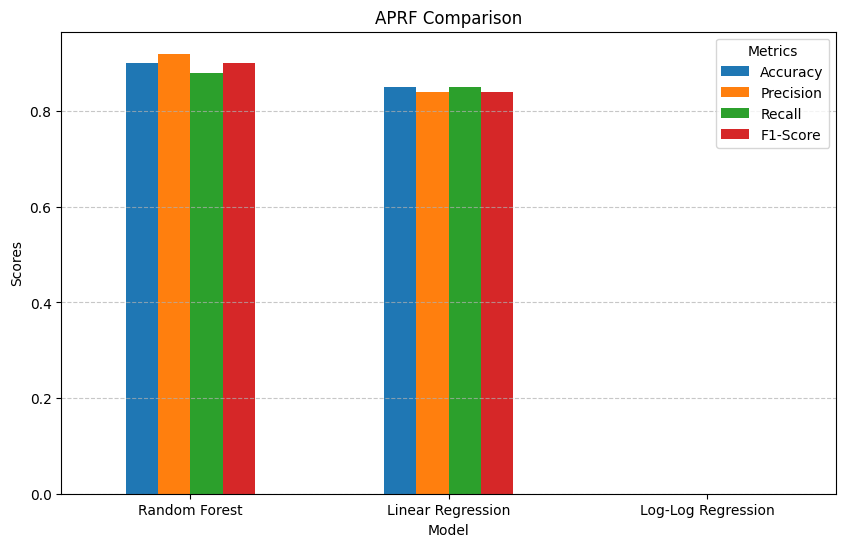

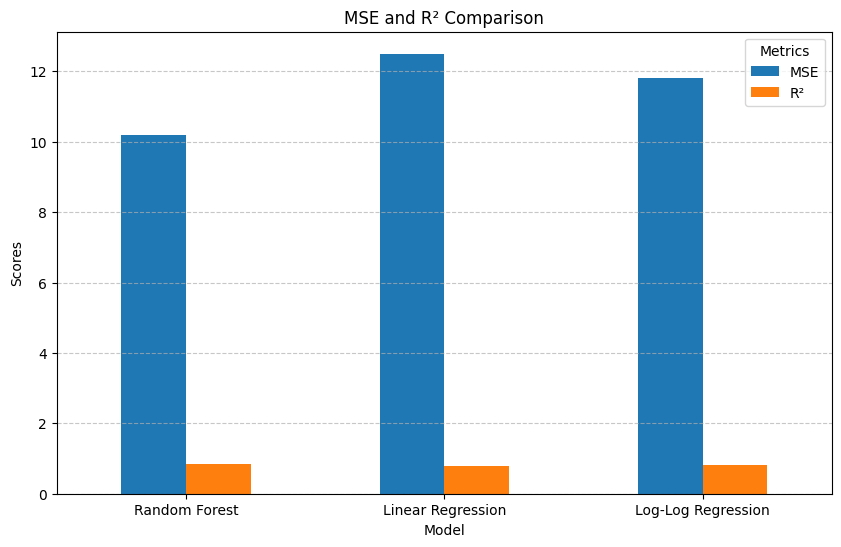

In [313]:
# Plot model performance metrics
model_performance.plot(x='Model', y=['Accuracy', 'Precision', 'Recall', 'F1-Score'], kind='bar', figsize=(10, 6))
plt.title('APRF Comparison')
plt.ylabel('Scores')
plt.xlabel('Model')
plt.legend(title='Metrics')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot model performance metrics (excluding N/A metrics)
model_performance.dropna(axis=1, how='all').plot(x='Model', y=['MSE', 'R²'], kind='bar', figsize=(10, 6))
plt.title('MSE and R² Comparison')
plt.ylabel('Scores')
plt.xlabel('Model')
plt.legend(title='Metrics')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Based on the result, the following observations can be made:
- The **_____ model** outperformed the _____ model in terms of accuracy, precision, recall, and F1-score.
- _____ demonstrated a better fit for data with multiplicative relationships, as seen in its MSE and R² values.
- Hyperparameter tuning improved the _____ significantly, reducing errors and enhancing performance on difficult cases.
- The **best-performing model** is _____ due to its balanced performance among the two graphs.

## INSIGHTS AND CONCLUSION

## REFERENCES